In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
filepath = "/home/idies/workspace/Storage/Mathisa5/persistent/small_1800.h5"

In [3]:
pd.set_option('display.precision', 15)

In [4]:
import h5py

with h5py.File(filepath, "r") as f:
    def explore(name, item):
        print(name, type(item))

    f.visititems(explore)

is_pulsar <class 'h5py._hl.dataset.Dataset'>
phi <class 'h5py._hl.dataset.Dataset'>


In [5]:
# there are 2 datasets, X and y. Let's examine the X
with h5py.File(filepath, "r") as f:
    X = f["phi"][:]
    print("shape:", X.shape)

shape: (14476, 1800)


In [6]:
# there are 2 datasets, X and y. Let's examine the y
with h5py.File(filepath, "r") as f:
    y = f["is_pulsar"][:]
    print("shape:", y.shape)

shape: (14476,)


In [7]:
X

array([[ 402.,    0.,    0., ..., 1863., 5823., 1233.],
       [3672., 4644., 1421., ..., 3143., 3682.,  644.],
       [ 780., 1026.,  783., ..., 1597., 1078., 1700.],
       ...,
       [2204., 2563.,  978., ...,   76., 3102.,    0.],
       [2204.,  658., 1560., ...,    0., 2848., 4124.],
       [   0.,    0., 7477., ...,    0., 3873.,    0.]],
      shape=(14476, 1800))

In [8]:
X_df = pd.DataFrame(X)
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
0,402.0,0.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,...,563.0,1076.0,1414.0,3610.0,4838.0,1048.0,2478.0,1863.0,5823.0,1233.0
1,3672.0,4644.0,1421.0,1460.0,403.0,911.0,1146.0,6425.0,5238.0,5979.0,...,819.0,1117.0,6815.0,1888.0,2031.0,1211.0,1370.0,3143.0,3682.0,644.0
2,780.0,1026.0,783.0,495.0,2951.0,3051.0,1859.0,1408.0,723.0,2032.0,...,1671.0,824.0,2686.0,917.0,1940.0,3917.0,821.0,1597.0,1078.0,1700.0
3,4776.0,868.0,3402.0,1327.0,819.0,511.0,4444.0,3561.0,1068.0,1123.0,...,1516.0,1168.0,5467.0,1660.0,463.0,6544.0,712.0,4573.0,966.0,4676.0
4,6265.0,3519.0,3275.0,1351.0,734.0,4143.0,1932.0,11209.0,387.0,1316.0,...,3692.0,4714.0,1623.0,3333.0,1218.0,2033.0,1411.0,1634.0,7702.0,1500.0


In [9]:
y_df = pd.DataFrame(y)
y_df.value_counts()

0
1    11145
0     3331
Name: count, dtype: int64

In [10]:
# thus there are 11145 pulsars and 3331 black holes, moderately imbalanced learning problem

## Pulsar Distribution Analysis

In [11]:
# Let's take a look at a sample observation for a pulsar
pulsars_df = X_df[(y_df == 1).values]
pulsars_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
594,331.0,635.0,571.0,0.0,3964.0,3622.0,5950.0,242.0,1349.0,392.0,...,6457.0,0.0,1454.0,1458.0,186.0,40.0,0.0,57.0,6877.0,0.0
595,115.0,4178.0,1328.0,0.0,321.0,34.0,0.0,0.0,277.0,0.0,...,167.0,2571.0,0.0,0.0,806.0,65.0,3088.0,1209.0,3833.0,271.0
596,114.0,301.0,4.0,2165.0,3247.0,748.0,2492.0,836.0,0.0,2507.0,...,0.0,186.0,0.0,4343.0,29.0,3327.0,151.0,0.0,3453.0,1715.0
597,2860.0,5153.0,4446.0,259.0,0.0,0.0,0.0,3332.0,0.0,0.0,...,0.0,43.0,1969.0,2399.0,1353.0,251.0,4578.0,56.0,27.0,3301.0
598,1349.0,2540.0,2164.0,716.0,1975.0,18.0,378.0,76.0,3042.0,662.0,...,0.0,729.0,6001.0,3736.0,4122.0,253.0,195.0,0.0,583.0,6295.0


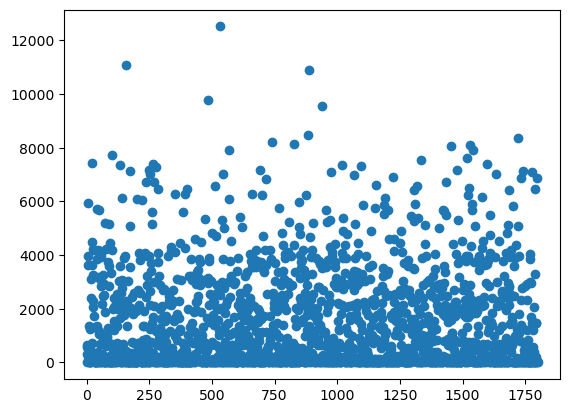

In [12]:
plt.scatter(pulsars_df.columns,pulsars_df.iloc[0])

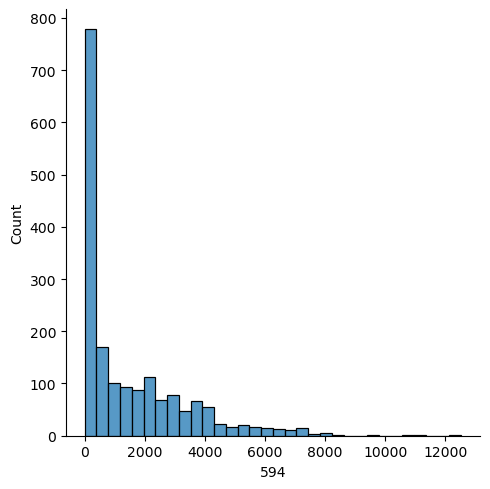

In [13]:
sns.displot(pulsars_df.iloc[0])

In [14]:
pulsars_df.iloc[0].describe()

count     1800.000000000000000
mean      1481.250000000000000
std       1849.612507455989316
min          0.000000000000000
25%          0.000000000000000
50%        697.000000000000000
75%       2402.250000000000000
max      12522.000000000000000
Name: 594, dtype: float64

In [15]:
# let's normalize the data and then plot again

In [16]:
pulsar_0 = pulsars_df.iloc[0]
pulsar_0_mean = pulsar_0.mean()
pulsar_0_std = pulsar_0.std()
pulsar_0_norm = (pulsar_0 - pulsar_0_mean) / pulsar_0_std
pulsar_0_norm.describe()

count    1.800000000000000e+03
mean     4.934324553889585e-18
std      1.000000000000000e+00
min     -8.008434166772338e-01
25%     -8.008434166772338e-01
50%     -4.240077296399126e-01
75%      4.979421345213383e-01
max      5.969223259192688e+00
Name: 594, dtype: float64

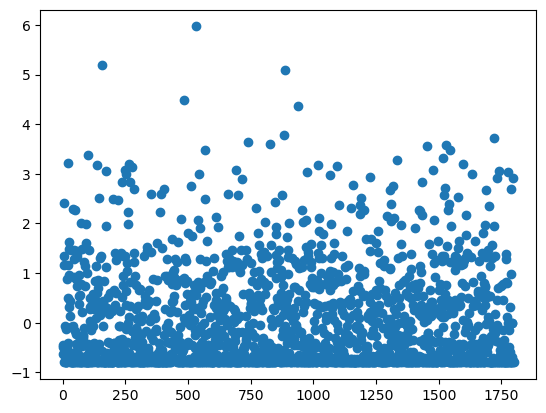

In [17]:
plt.scatter(pulsar_0_norm.index, pulsar_0_norm)

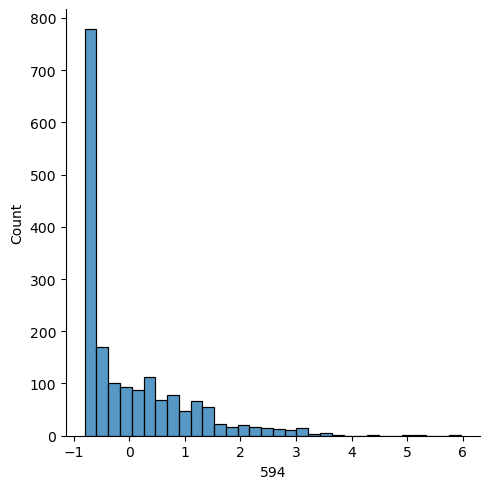

In [18]:
sns.displot(pulsar_0_norm)

In [19]:
# very right skewed now, let's log transform
pulsar_0_log = np.log1p(pulsar_0_norm)
pulsar_0_log.describe()

count    1800.000000000000000
mean       -0.482721181454749
std         0.994216244024873
min        -1.613663912794324
25%        -1.613663912794324
50%        -0.551662800011903
75%         0.404091267680433
max         1.941503777987533
Name: 594, dtype: float64

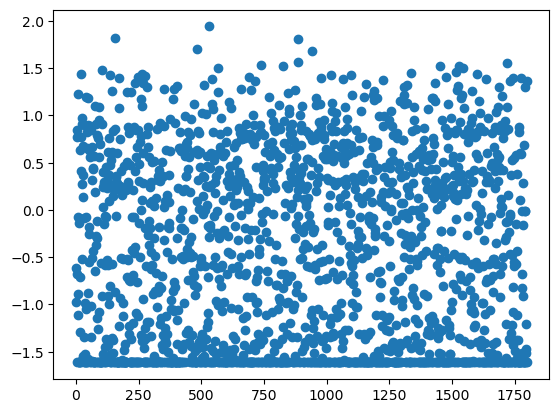

In [20]:
plt.scatter(pulsar_0_log.index, pulsar_0_log)

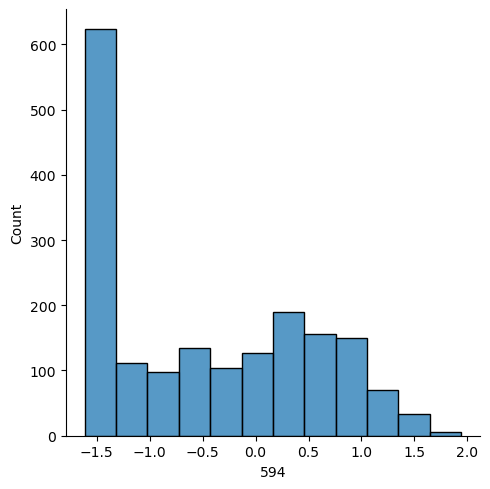

In [21]:
sns.displot(pulsar_0_log)

## Black Hole Distribution Analysis

In [22]:
# now let's see if there is a difference in distribution of these measurements for a black hole

In [23]:
bh_df = X_df[(y_df == 0).values]
bh_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
0,402.0,0.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,...,563.0,1076.0,1414.0,3610.0,4838.0,1048.0,2478.0,1863.0,5823.0,1233.0
1,3672.0,4644.0,1421.0,1460.0,403.0,911.0,1146.0,6425.0,5238.0,5979.0,...,819.0,1117.0,6815.0,1888.0,2031.0,1211.0,1370.0,3143.0,3682.0,644.0
2,780.0,1026.0,783.0,495.0,2951.0,3051.0,1859.0,1408.0,723.0,2032.0,...,1671.0,824.0,2686.0,917.0,1940.0,3917.0,821.0,1597.0,1078.0,1700.0
3,4776.0,868.0,3402.0,1327.0,819.0,511.0,4444.0,3561.0,1068.0,1123.0,...,1516.0,1168.0,5467.0,1660.0,463.0,6544.0,712.0,4573.0,966.0,4676.0
4,6265.0,3519.0,3275.0,1351.0,734.0,4143.0,1932.0,11209.0,387.0,1316.0,...,3692.0,4714.0,1623.0,3333.0,1218.0,2033.0,1411.0,1634.0,7702.0,1500.0


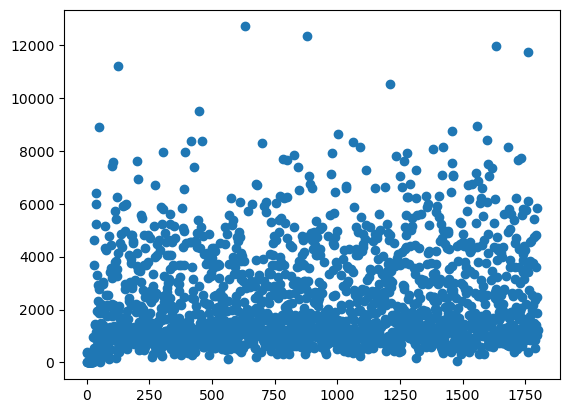

In [24]:
bh_0 = bh_df.iloc[0]
plt.scatter(bh_0.index, bh_0)

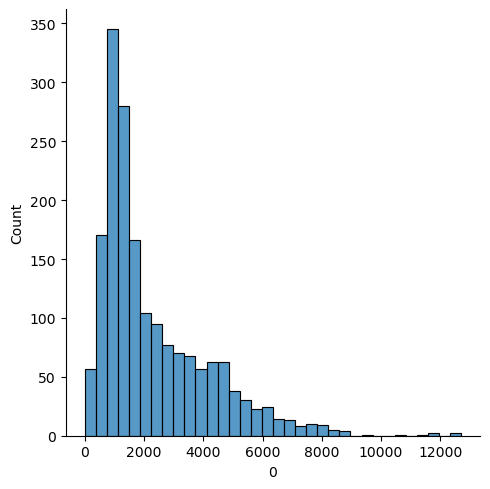

In [25]:
sns.displot(bh_0)

In [26]:
# we can see a clear difference even in the unnormalized distribution already

In [27]:
bh_0.describe()

count     1800.000000000000000
mean      2313.493888888888705
std       1853.686125322550197
min          0.000000000000000
25%        986.000000000000000
50%       1602.000000000000000
75%       3307.000000000000000
max      12702.000000000000000
Name: 0, dtype: float64

In [28]:
bh_0_mean = bh_0.mean()
bh_0_std = bh_0.std()
bh_0_norm = (bh_0 - bh_0_mean) / bh_0_std

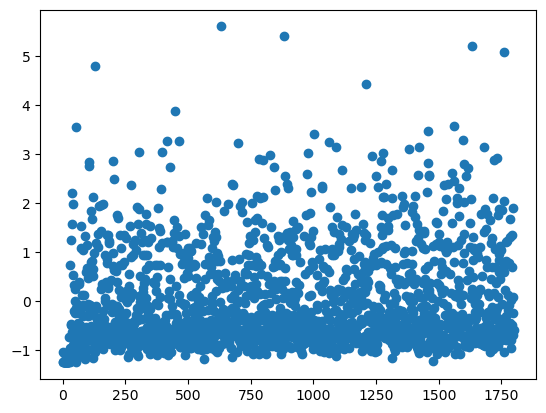

In [29]:
plt.scatter(bh_0_norm.index, bh_0_norm)

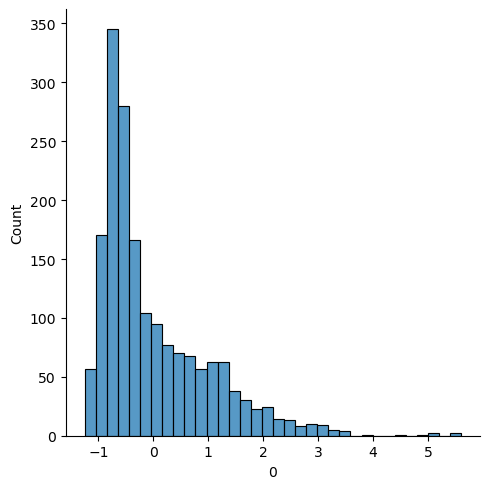

In [30]:
sns.displot(bh_0_norm)

In [31]:
bh_0_norm.describe()

count    1.800000000000000e+03
mean     1.105288700071267e-16
std      9.999999999999999e-01
min     -1.248050496405550e+00
25%     -7.161373604487106e-01
50%     -3.838265168894682e-01
75%      5.359624251048631e-01
max      5.604242255038437e+00
Name: 0, dtype: float64

In [32]:
bh_0_log = np.log1p(bh_0_norm)

/home/idies/miniforge3/envs/heasoft/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


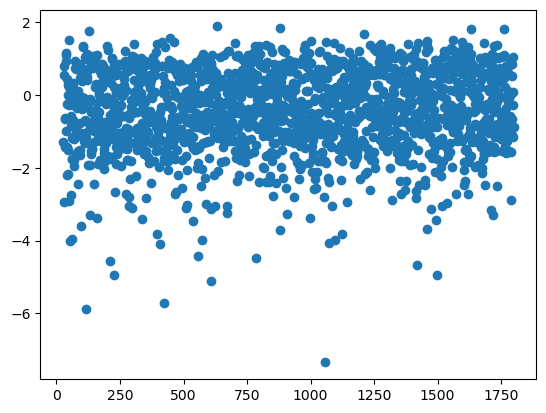

In [33]:
plt.scatter(bh_0_log.index, bh_0_log)

In [34]:
bh_0_log.describe()

count    1718.000000000000000
mean       -0.443712203876678
std         1.122274585332079
min        -7.349100536489653
25%        -1.144059895212930
50%        -0.436779675121618
75%         0.467402193960332
max         1.887712208461760
Name: 0, dtype: float64

## Pulsar v BH Macro Analysis

In [35]:
# pulsars_sample_df = pulsars_df.sample(frac=0.2)
# bh_sample_df = bh_df.sample(frac=0.2)

In [36]:
# plt.figure(figsize=(10,6))
# sns.heatmap(pulsars_sample_df.corr(), annot=False, cmap="coolwarm")
# plt.title("Pulsars Correlation Matrix")
# plt.show()

# plt.figure(figsize=(10,6))
# sns.heatmap(bh_sample_df.corr(), annot=False, cmap="coolwarm")
# plt.title("Black Holes Correlation Matrix")
# plt.show()

In [37]:
# corr_diff = pulsars_sample_df.corr() - bh_sample_df.corr()

# plt.figure(figsize=(10,6))
# sns.heatmap(corr_diff, cmap="bwr", center=0)
# plt.title("Correlation Differences (Pulsars - Black Holes)")
# plt.show()

In [38]:
pulsars_df.shape, bh_df.shape

((11145, 1800), (3331, 1800))

In [39]:
def stats_block(df, name):
    desc = df.describe().T  # count, mean, std, min, 25%, 50%, 75%, max
    desc = desc.rename(columns={
        '25%': 'q1',
        '50%': 'median',
        '75%': 'q3'
    })

    # Add IQR
    desc['iqr'] = desc['q3'] - desc['q1']
    
    # Add skew, kurtosis
    desc['skew'] = df.skew()
    desc['kurtosis'] = df.kurtosis()
    
    # Add group label
    desc['group'] = name
    
    return desc

p_stats = stats_block(pulsars_df, "Pulsars")
bh_stats = stats_block(bh_df, "Black Holes")

comparison_df = pd.concat([p_stats, bh_stats], axis=0)
comparison_df

,count,mean,std,min,q1,median,q3,max,iqr,skew,kurtosis,group
0,11145.0,1200.035262449529000,1784.780772800449995,0.0,0.0,200.0,1986.0,16806.0,1986.0,1.901556593679333,4.270750451593182,Pulsars
1,11145.0,1168.097532525796396,1746.646996541097224,0.0,0.0,170.0,1990.0,12811.0,1990.0,1.843575385204404,3.703325212834758,Pulsars
2,11145.0,1186.891341408703511,1785.080981848302827,0.0,0.0,184.0,1923.0,15135.0,1923.0,1.883390605350600,3.860636863777075,Pulsars
3,11145.0,1177.958277254374252,1735.659726930467741,0.0,0.0,183.0,2029.0,13115.0,2029.0,1.821748473754318,3.686229988630863,Pulsars
4,11145.0,1177.262808434275485,1746.845632706031665,0.0,0.0,184.0,1996.0,12288.0,1996.0,1.819225358479074,3.562909668939631,Pulsars
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,3331.0,1395.507955568898296,1917.187076277951746,0.0,0.0,465.0,2235.5,14437.0,2235.5,1.747034424867559,3.313371569853037,Black Holes
1796,3331.0,1362.106274392074511,1923.424806198245506,0.0,0.0,434.0,2197.5,15931.0,2197.5,1.898897263226839,4.445523284149949,Black Holes
1797,3331.0,1316.203242269588600,1852.943679905678664,0.0,0.0,429.0,2038.5,11224.0,2038.5,1.845793893274444,3.629461565954683,Black Holes
1798,3331.0,1390.749324527168937,1989.055568192893134,0.0,0.0,405.0,2170.0,12552.0,2170.0,1.854138086729755,3.514827301985728,Black Holes


In [40]:
wide = comparison_df.pivot_table(index=comparison_df.index, 
                                 columns='group')
wide.columns = ['_'.join(c) for c in wide.columns]

# Compute differences
diff_df = pd.DataFrame()

for col in ['mean', 'std', 'min', 'q1', 'median', 'q3', 'max', 'iqr', 'skew', 'kurtosis']:
    diff_df[col + '_diff'] = wide[col + '_Pulsars'] - wide[col + '_Black Holes']
diff_df

,mean_diff,std_diff,min_diff,q1_diff,median_diff,q3_diff,max_diff,iqr_diff,skew_diff,kurtosis_diff
0,-122.841351180011770,-82.921920091407628,0.0,0.0,-220.0,-130.5,3030.0,-130.5,0.015031177184366,0.099565597442533
1,-158.507691130763305,-109.773309292860631,0.0,0.0,-260.0,-115.0,-1358.0,-115.0,0.045404038143316,0.125900522886399
2,-176.868190263467113,-126.201205301039863,0.0,0.0,-278.0,-184.5,2236.0,-184.5,0.040971132495981,0.145880573739406
3,-121.297501790957540,-107.219787777046804,0.0,0.0,-235.0,-15.0,96.0,-15.0,-0.075464888593907,-0.367584276096886
4,-129.046708227387626,-106.718540963822306,0.0,0.0,-226.0,-51.5,-1572.0,-51.5,-0.036607861588883,-0.278675816038723
...,...,...,...,...,...,...,...,...,...,...
1795,-195.581531163335285,-174.544057131097134,0.0,0.0,-260.0,-197.5,766.0,-197.5,0.044444801474984,0.357043517937119
1796,-155.600935675161054,-135.970807323991949,0.0,0.0,-240.0,-175.5,-1094.0,-175.5,-0.041898214868181,-0.591636248279129
1797,-125.587899066358432,-85.980537509106625,0.0,0.0,-231.0,-47.5,4400.0,-47.5,0.065349239016948,0.717211377339801
1798,-220.016798730847768,-239.536484861293957,0.0,0.0,-229.0,-209.0,-91.0,-209.0,-0.040259527449172,-0.111511165436160


<Axes: >

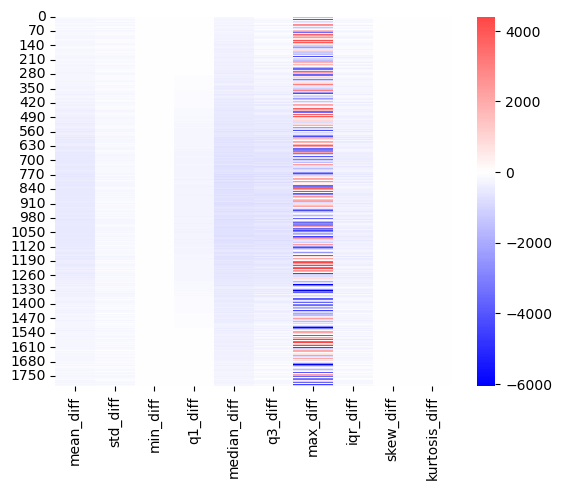

In [41]:
sns.heatmap(diff_df, cmap="bwr", center=0)

In [42]:
# So it looks like we can create these statistics as features (max diff will be an important predictor)
# this compares per feature i.e.  do pulsars and black holes differ per time step (the answer looks to be yes)

In [43]:
# Now let's consider the per row statistics (do the time series of pulsars time series shape differ compared to black holes)

In [44]:
def row_summary_stats(df):
    num_df = df.select_dtypes(include='number')
    
    summary = pd.DataFrame({
        'mean':   num_df.mean(axis=1),
        'std':    num_df.std(axis=1),
        'min':    num_df.min(axis=1),
        'q1':     num_df.quantile(0.25, axis=1),
        'median': num_df.quantile(0.50, axis=1),
        'q3':     num_df.quantile(0.75, axis=1),
        'max':    num_df.max(axis=1),
        'iqr':    num_df.quantile(0.75, axis=1) - num_df.quantile(0.25, axis=1),
        'skew':   num_df.skew(axis=1),
        'kurtosis': num_df.kurtosis(axis=1)
    })
    
    return summary

In [65]:
p_row_stats = row_summary_stats(pulsars_df)

In [66]:
bh_row_stats = row_summary_stats(bh_df)

In [67]:
p_row_stats.shape, bh_row_stats.shape

((11145, 10), (3331, 10))

<Axes: >

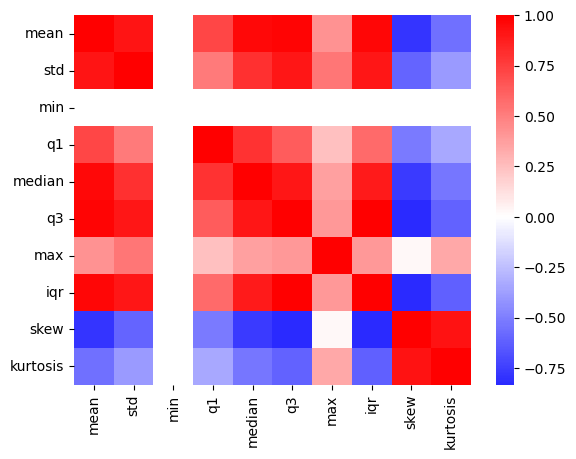

In [68]:
p_row_corr = p_row_stats.sample(frac=.2).corr()
sns.heatmap(p_row_corr, cmap="bwr", center=0)

<Axes: >

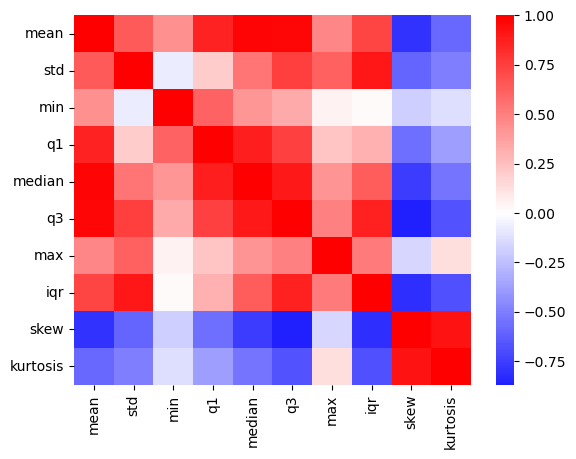

In [69]:
bh_row_corr = bh_row_stats.sample(frac=.2).corr()
sns.heatmap(bh_row_corr, cmap="bwr", center=0)

<Axes: >

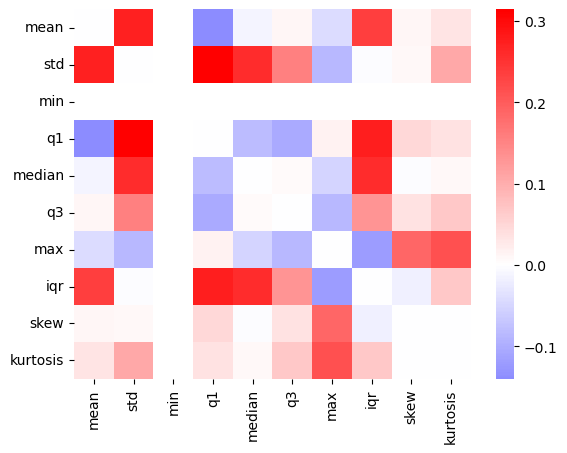

In [70]:
sns.heatmap(p_row_corr - bh_row_corr, cmap="bwr", center=0)

In [71]:
p_row_stats["group"] = "pulsar"
bh_row_stats["group"] = "bh"
row_stats = pd.concat([p_row_stats, bh_row_stats], axis=0).reset_index(drop=True)
row_stats.shape

(14476, 11)

In [72]:
row_stats.head()

,mean,std,min,q1,median,q3,max,iqr,skew,kurtosis,group
0,1481.250000000000000,1849.612507455989316,0.0,0.0,697.0,2402.25,12522.0,2402.25,1.585469593376977,2.743842933811217,pulsar
1,1478.492222222222154,1848.747698961159131,0.0,0.0,693.0,2411.00,12522.0,2411.00,1.585326440425273,2.739601646041901,pulsar
2,1471.214444444444553,1845.343832322604158,0.0,0.0,678.0,2385.50,12522.0,2385.50,1.597439437300348,2.793968368119551,pulsar
3,1468.466666666666697,1845.243821100812511,0.0,0.0,670.5,2380.50,12522.0,2380.50,1.601141543786311,2.805347605477940,pulsar
4,1466.661666666666633,1843.232126761775362,0.0,0.0,672.5,2358.00,12522.0,2358.00,1.600364076605373,2.798479946385628,pulsar


In [83]:
row_stats.describe()

,mean,std,min,q1,median,q3,max,iqr,skew,kurtosis
count,14476.000000000000000,14476.000000000000000,14476.000000000000000,14476.000000000000000,14476.000000000000000,14476.000000000000000,14476.000000000000000,14476.000000000000000,14476.000000000000000,14476.000000000000000
mean,1428.429504275275576,1826.273826841666505,1.955443492677535,76.452317629179333,544.787683061619191,2353.304210417242302,11897.267891682784466,2276.851892788063196,1.656556829864235,3.000471961058293
std,325.575921812330932,157.652779915257668,14.720855134573895,206.542658576204701,407.849428741319969,474.588517518061508,1595.785192064879539,376.333378423424051,0.190745912377869,0.926081909859381
min,842.167777777777815,1461.873025178693752,0.000000000000000,0.000000000000000,75.500000000000000,757.750000000000000,8112.000000000000000,757.750000000000000,1.136012148933013,0.966231030757409
25%,1186.790972222222308,1703.315153936799788,0.000000000000000,0.000000000000000,231.000000000000000,2014.625000000000000,10840.000000000000000,2005.000000000000000,1.517606865932604,2.369702078292411
50%,1354.512777777777728,1809.829084210797873,0.000000000000000,0.000000000000000,384.500000000000000,2280.250000000000000,11669.000000000000000,2254.500000000000000,1.650580675380091,2.858535655647538
75%,1576.187500000000000,1933.692384235854661,0.000000000000000,53.000000000000000,756.000000000000000,2635.500000000000000,12655.250000000000000,2550.500000000000000,1.783244392145486,3.499410106756209
max,2630.610000000000127,2544.287686151187245,181.000000000000000,1100.000000000000000,2083.000000000000000,3952.250000000000000,17738.000000000000000,3399.500000000000000,2.529790486598117,8.740152801404927


In [85]:
row_stats_norm = (row_stats.drop(columns=["group"]) - row_stats.drop(columns=["group"]).mean())/ row_stats.drop(columns=["group"]).std()
row_stats_norm.describe()

,mean,std,min,q1,median,q3,max,iqr,skew,kurtosis
count,1.447600000000000e+04,1.447600000000000e+04,1.447600000000000e+04,1.447600000000000e+04,1.447600000000000e+04,1.447600000000000e+04,1.447600000000000e+04,1.447600000000000e+04,1.447600000000000e+04,1.447600000000000e+04
mean,-9.424164497508928e-17,8.010539822882588e-16,-3.926735207295386e-17,3.141388165836309e-17,6.282776331672618e-17,7.853470414590773e-17,5.261825177775818e-16,-5.026221065338095e-16,8.795886864341666e-16,-3.141388165836309e-16
std,1.000000000000000e+00,1.000000000000000e+00,1.000000000000000e+00,1.000000000000000e+00,1.000000000000000e+00,1.000000000000000e+00,1.000000000000000e+00,1.000000000000000e+00,1.000000000000000e+00,1.000000000000000e+00
min,-1.800691289558666e+00,-2.311413740111956e+00,-1.328349117494482e-01,-3.701526752691234e-01,-1.150639549771851e+00,-3.361973902700922e+00,-2.372040993051706e+00,-4.036585591084285e+00,-2.728995208557964e+00,-2.196610157960833e+00
25%,-7.421879686555537e-01,-7.799334269332907e-01,-1.328349117494482e-01,-3.701526752691234e-01,-7.693713928446868e-01,-7.136270641110762e-01,-6.625377255912018e-01,-7.223698677139248e-01,-7.284557881186499e-01,-6.811167306590188e-01
50%,-2.270337624663321e-01,-1.043098804836051e-01,-1.328349117494482e-01,-3.701526752691234e-01,-3.930070064246241e-01,-1.539316854931326e-01,-1.430442473196629e-01,-5.939386211688724e-02,-3.133044587768199e-02,-1.532653903500899e-01
75%,4.538357594204875e-01,6.813616445706084e-01,-1.328349117494482e-01,-1.135470889686767e-01,5.178683652695344e-01,5.946114985220183e-01,4.749900626264230e-01,7.271428018379147e-01,6.641692118166180e-01,5.387624360070662e-01
max,3.692473598885140e+00,4.554400243975851e+00,1.216264645433623e+01,4.955623644174111e+00,3.771520096731575e+00,3.369120260103862e+00,3.660099202173666e+00,2.983121273789357e+00,4.577994075196742e+00,6.197811207885665e+00


In [86]:
row_stats_norm["group"] = row_stats["group"]

<Axes: xlabel='group', ylabel='mean'>

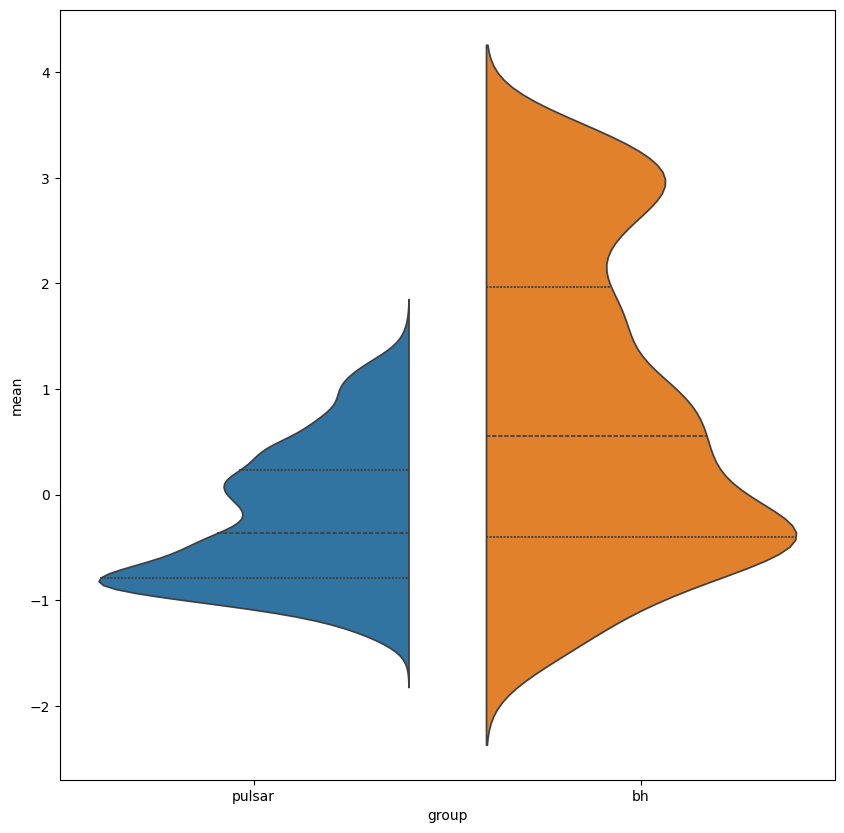

In [87]:
plt.figure(figsize=(10,10))
sns.violinplot(x="group", y="mean", hue="group", data=row_stats_norm, split=True, inner="quart")

<Axes: xlabel='group', ylabel='iqr'>

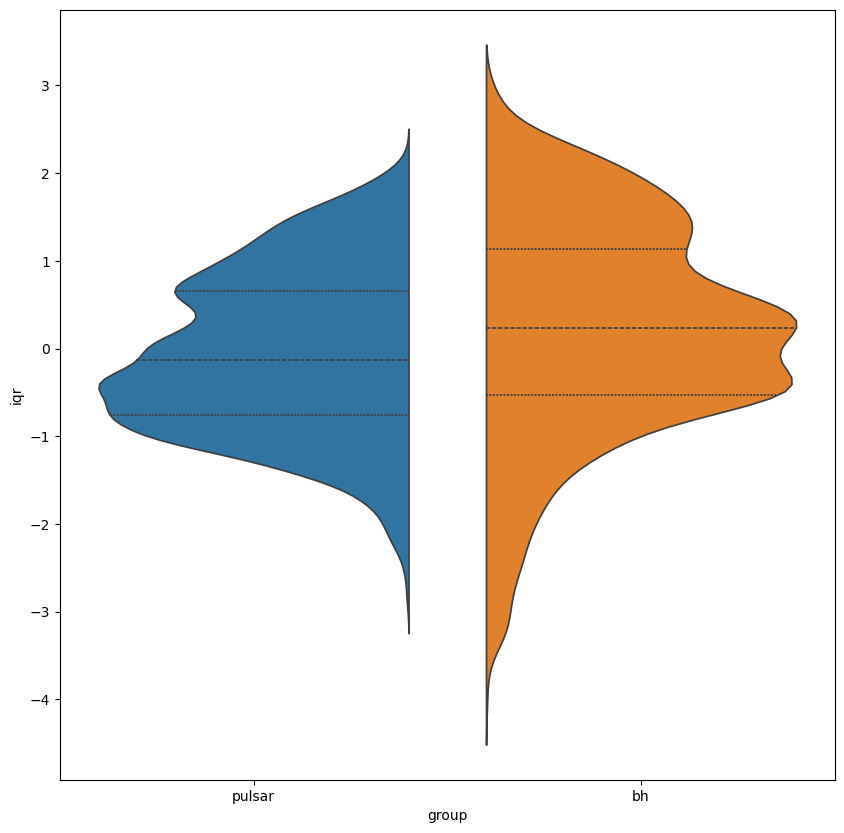

In [88]:
plt.figure(figsize=(10,10))
sns.violinplot(x="group", y="iqr", hue="group", data=row_stats_norm, split=True, inner="quart")

<Axes: xlabel='group', ylabel='std'>

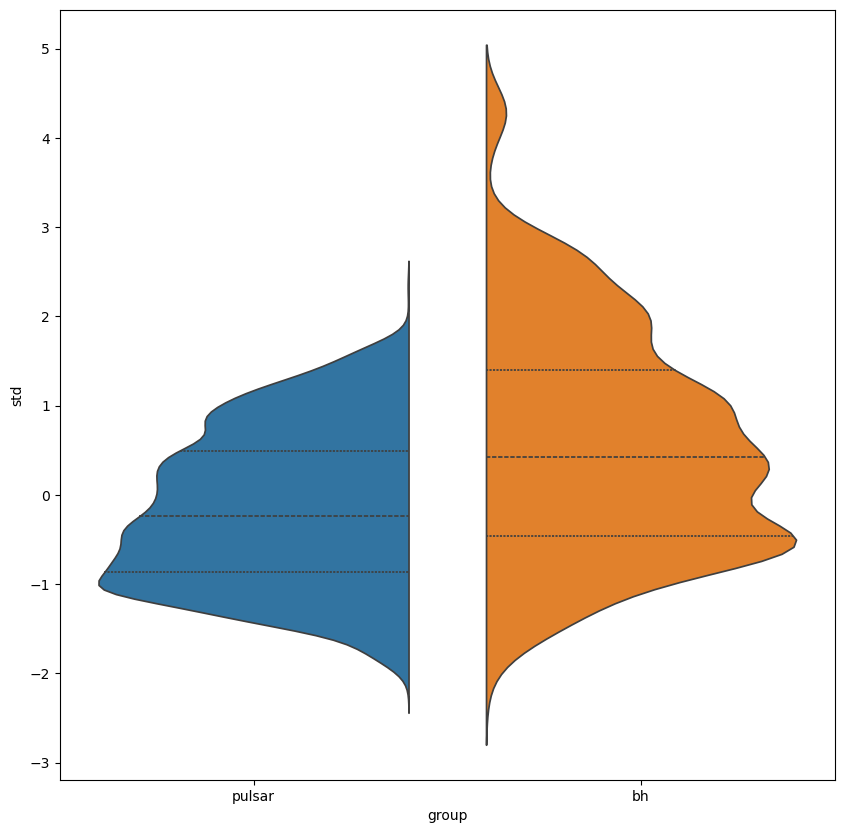

In [89]:
plt.figure(figsize=(10,10))
sns.violinplot(x="group", y="std", hue="group", data=row_stats_norm, split=True, inner="quart")

<Axes: xlabel='group', ylabel='q1'>

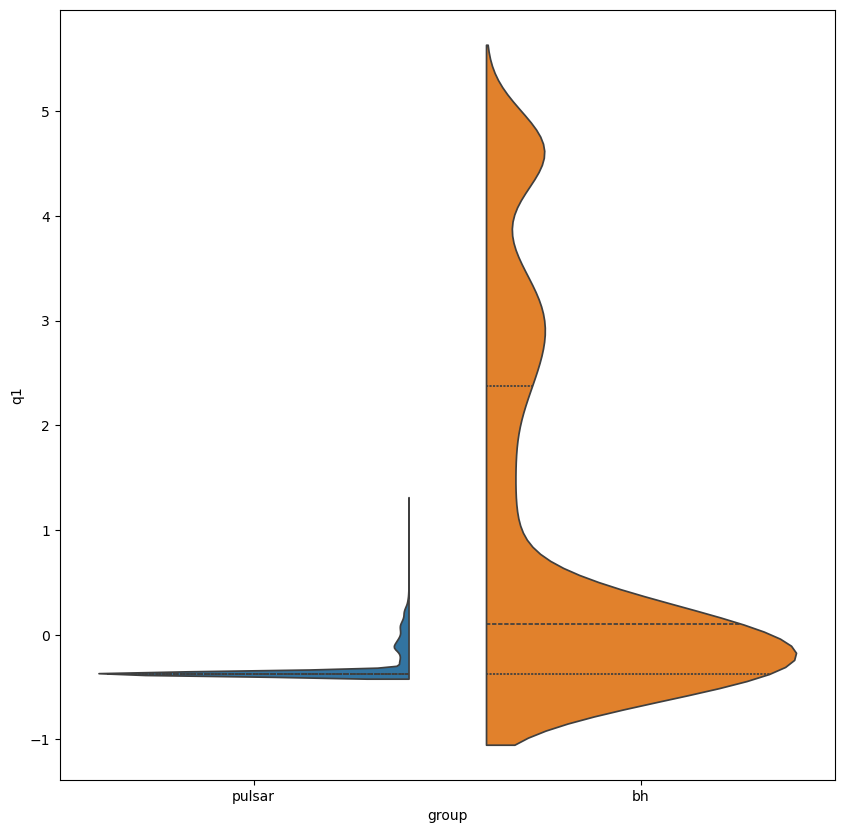

In [90]:
plt.figure(figsize=(10,10))
sns.violinplot(x="group", y="q1", hue="group", data=row_stats_norm, split=True, inner="quart")

<Axes: xlabel='group', ylabel='median'>

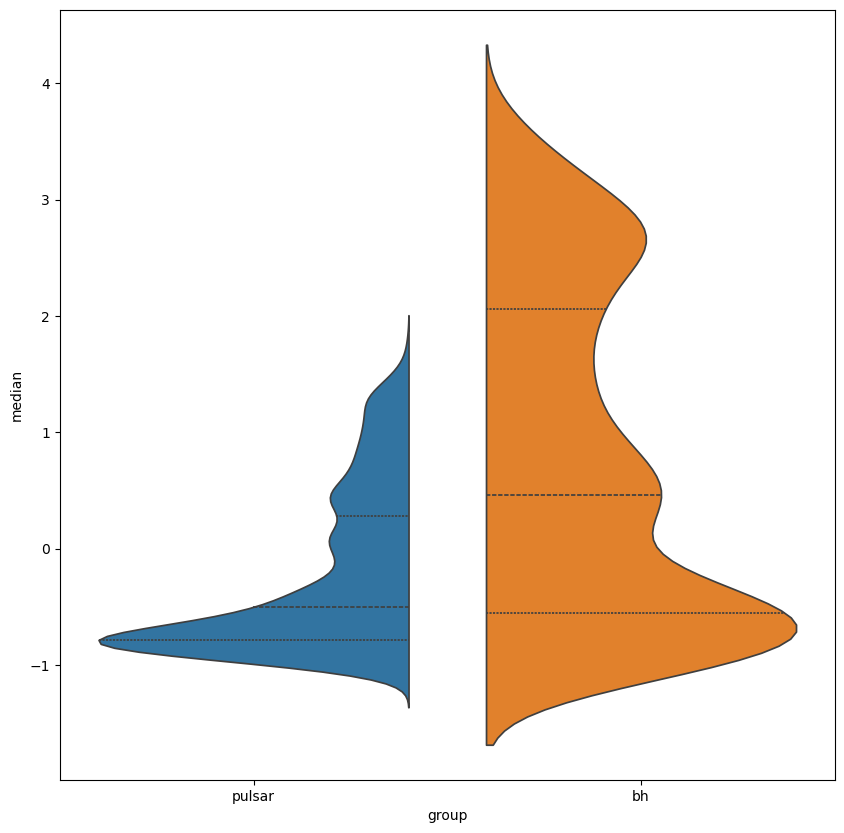

In [91]:
plt.figure(figsize=(10,10))
sns.violinplot(x="group", y="median", hue="group", data=row_stats_norm, split=True, inner="quart")

In [92]:
p_summary = p_row_stats.describe().T.drop(columns=["count"])
bh_summary = bh_row_stats.describe().T.drop(columns=["count"])

# comparison_row_df = pd.concat([
#     p_summary.assign(group='Pulsar'),
#     bh_summary.assign(group='Black Hole')
# ])
# comparison_row_df.shape

In [93]:
# comparison_row_df

<Axes: >

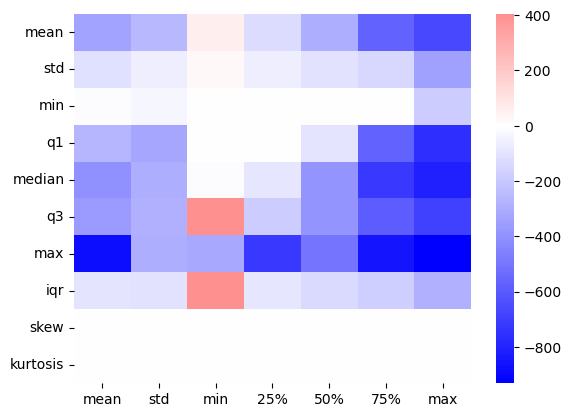

In [94]:
sns.heatmap(p_summary - bh_summary, cmap="bwr", center=0)

In [95]:
# looks like there are significant differences among the mean, max, and quartile ranges between observations from the two classes

In [102]:
row_stats["label"] = row_stats["group"]
row_stats.drop(inplace=True, columns=["group"])
row_stats.head()

,mean,std,min,q1,median,q3,max,iqr,skew,kurtosis,label
0,1481.250000000000000,1849.612507455989316,0.0,0.0,697.0,2402.25,12522.0,2402.25,1.585469593376977,2.743842933811217,pulsar
1,1478.492222222222154,1848.747698961159131,0.0,0.0,693.0,2411.00,12522.0,2411.00,1.585326440425273,2.739601646041901,pulsar
2,1471.214444444444553,1845.343832322604158,0.0,0.0,678.0,2385.50,12522.0,2385.50,1.597439437300348,2.793968368119551,pulsar
3,1468.466666666666697,1845.243821100812511,0.0,0.0,670.5,2380.50,12522.0,2380.50,1.601141543786311,2.805347605477940,pulsar
4,1466.661666666666633,1843.232126761775362,0.0,0.0,672.5,2358.00,12522.0,2358.00,1.600364076605373,2.798479946385628,pulsar


In [103]:
row_stats.to_csv("feat_engineered_dset.csv")

In [100]:
row_stats_norm["label"] = row_stats_norm["group"]
row_stats_norm.drop(inplace=True, columns=["group"])
row_stats_norm.head()

,mean,std,min,q1,median,q3,max,iqr,skew,kurtosis,label
0,0.162237107187464,0.148038497176313,-0.132834911749448,-0.370152675269123,0.373207135310031,0.103133109580332,0.391488849140678,0.333210165245687,-0.372680261406778,-0.277112666293247,pulsar
1,0.153766647325363,0.142552970721943,-0.132834911749448,-0.370152675269123,0.363399594295828,0.121570133817159,0.391488849140678,0.356460826764621,-0.373430751678989,-0.281692485555628,pulsar
2,0.131413096923768,0.120962062902971,-0.132834911749448,-0.370152675269123,0.326621315492564,0.067839377469836,0.391488849140678,0.288701756052299,-0.309927441311433,-0.222986315508634,pulsar
3,0.122973351863746,0.120327686383601,-0.132834911749448,-0.370152675269123,0.308232176090933,0.057303935048792,0.391488849140678,0.275415663755765,-0.290518865579389,-0.210698809147435,pulsar
4,0.117429330088571,0.107567401787805,-0.132834911749448,-0.370152675269123,0.313135946598034,0.009894444154096,0.391488849140678,0.215628248421363,-0.294594796598020,-0.218114631678030,pulsar


In [101]:
row_stats_norm.to_csv("feat_engineered_normalized_dset.csv")